# 15 Dynamic Programming I

## Plan for the Lecture

1. Origins of DP - Richard Bellman's principle of optimality

2. Top-down (Memoization) vs (bottom-up) tabulation strategies

4. Shortest Paths and Topological Sort 

4. Network Flow - maximin and minimax 

## Styles of Programming: 

* Dijkstra's algorithm was an example of a 'greedy' algorithm. Local choices over 'global' choices. 

* We've also seen the 'Divide and Conquer' style of programming - logarithmic principles. 

* Dynamic Programming is another style of programming - reuse of subproblems where they overlap. 

## Introduction to Dynamic Programming 

* Dynamic programming is a technique for solving multi-stage decision-making problems. 

* It involves  a sequence of decisions, the object of which is to optimise time, profit, cost, or resources by taking the  correct decision at each stage. 

* It was first developed by Richard Bellman and others in the 1950s as a management tool. 

* it has since been applied to production planning, machine scheduling, stock control,  allocation of resources, maintenance and replacement of equipment, investment planning and process design, amongst others. 


## Richard Bellman's Principle of Optimality

* Richard Bellman (1920 - 1984) was an American Mathematician who first proposed The Theory of Dynamic Programming in the 1950s (when programming was in its infancy - long before C, C++, C#, Java, Python).

* Bellman coined the term 'Curse of Dimensionality' (exponential increase in volume from adding more dimensions to a mathematical space - think of 1D, 2D, 3D). 

* Alongside Lester Ford Jr, he also published the 'Bellman-Ford Algorithm' for shortest path analysis of graphs - which unlike Edsgar Dijkstra's algorithm - can handle negative weights. Dijkstra's was only engineered to handle non-negative (positive) weights.

![Rich_E_Bellman](https://upload.wikimedia.org/wikipedia/en/7/7a/Richard_Ernest_Bellman.jpg)

<!--![Theory_of_Dyn_Prog](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*u9pGurRcoGhvgFFs2XEUww.png)-->

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*u9pGurRcoGhvgFFs2XEUww.png" alt="theory_dyn_prog" width="450">  

## The principle of optimality: 

> “In any optimal sequence of decisions or actions, whatever the initial decision or action may be, the remaining decisions or actions must constitute an optimal sequence with regard to the state resulting from the first decision.”
> - Richard Bellman 

## Essense of Dynamic Programming 

* Dynamic programming that is used to solve optimisation problems by dividing the problems into smaller subproblems.

* The principle relies on the idea that <b>optimal solutions to complex problems can be constructed from optimal solutions to their subproblems</b>. 

* Therefore <b>reuse of solutions to subproblems </b>

* This recursive nature allows for breaking down large problems into manageable parts.



## Top-down DP approach 

* The 'Top-down approach' is modelled as <b>Memoization with recursion</b>

* Stores solved problems in memory (hence the memo-) like caching. 

* Can then retrieve previously solved problems. Often used in a recursive function.

## Bottom-up DP approach

* The 'Bottom-down approach' is modelled as <b>Tabulation (or table) with iteration</b>

* Starts with smallest subproblem and solves in a predefined order – from smallest to largest. 

* Stores solutions in a table (hence the tablu- prefix) and then uses them to solve larger subproblems. 

* This map avoids the function call overhead and stack limitations of recursion. 

## Top-down vs Bottom-up

![top_down_vs_bottom_up](https://techdifferences.com/wp-content/uploads/2018/06/top-down-vs-bottom-up.jpg)

## Fibonnacci numbers example

$F(n) = F(n-1) + F(n-2)$    for $n >=2 $ 

Below is a niave recursive solution: 

In [19]:
fib_naive_count = 0

def fib_naive(n):
    global fib_naive_count
    fib_naive_count += 1 
    
    if n == 0: 
        return 0;     #base case F(0) = 0
    if n == 1: 
        return 1;     #base case F(1) = 0
    return fib_naive(n - 1) + fib_naive(n - 2);     #recursive call

In [26]:
for i in range (0,15):
    print("f(" + str(i) + ") = " + str( fib_naive(i)))

f(0) = 0
f(1) = 1
f(2) = 1
f(3) = 2
f(4) = 3
f(5) = 5
f(6) = 8
f(7) = 13
f(8) = 21
f(9) = 34
f(10) = 55
f(11) = 89
f(12) = 144
f(13) = 233
f(14) = 377


In [20]:
for i in range (0,15):
    fib_naive_count = 0
    print("f(" + str(i) + ") = " + str( fib_naive(i))+ " - took " + str(fib_naive_count) + " operations to compute")

f(0) = 0 - took 1 operations to compute
f(1) = 1 - took 1 operations to compute
f(2) = 1 - took 3 operations to compute
f(3) = 2 - took 5 operations to compute
f(4) = 3 - took 9 operations to compute
f(5) = 5 - took 15 operations to compute
f(6) = 8 - took 25 operations to compute
f(7) = 13 - took 41 operations to compute
f(8) = 21 - took 67 operations to compute
f(9) = 34 - took 109 operations to compute
f(10) = 55 - took 177 operations to compute
f(11) = 89 - took 287 operations to compute
f(12) = 144 - took 465 operations to compute
f(13) = 233 - took 753 operations to compute
f(14) = 377 - took 1219 operations to compute


In [22]:
for i in range (15,36):
    fib_naive_count = 0
    print("f(" + str(i) + ") = " + str( fib_naive(i))+ " - took " + str(fib_naive_count) + " operations to compute")

f(15) = 610 - took 1973 operations to compute
f(16) = 987 - took 3193 operations to compute
f(17) = 1597 - took 5167 operations to compute
f(18) = 2584 - took 8361 operations to compute
f(19) = 4181 - took 13529 operations to compute
f(20) = 6765 - took 21891 operations to compute
f(21) = 10946 - took 35421 operations to compute
f(22) = 17711 - took 57313 operations to compute
f(23) = 28657 - took 92735 operations to compute
f(24) = 46368 - took 150049 operations to compute
f(25) = 75025 - took 242785 operations to compute
f(26) = 121393 - took 392835 operations to compute
f(27) = 196418 - took 635621 operations to compute
f(28) = 317811 - took 1028457 operations to compute
f(29) = 514229 - took 1664079 operations to compute
f(30) = 832040 - took 2692537 operations to compute
f(31) = 1346269 - took 4356617 operations to compute
f(32) = 2178309 - took 7049155 operations to compute
f(33) = 3524578 - took 11405773 operations to compute
f(34) = 5702887 - took 18454929 operations to compute

Question: What is the runtime of this recursive algorithm? 

The time complexity of this original solution is exponential $O(2^n)$. For each Fibonacci number computed, two recursive calls are made (except for the base cases where $n <= 1$ ), leading to a binary tree of recursive calls with a height of $n$.

![Recursive_fib_tree](https://i.sstatic.net/8O0eb.jpg)

## Memoization (top-down DP approach)

* Dynamic programming that is used to solve optimisation problems by dividing the problems into smaller subproblems.

* The idea is to <b>solve subproblems once and then store solutions to subproblems in memory</b>. 

* This then allows the algorithm avoid redundant operations (to re-solve that subproblem) and optimise overall efficiency. 


## What is memoization? 

* Memo pad - to write down solutions (think 'notepad')

* To remember

* Recycle previously stored problems 

<img src="https://www.choicewholesale.co.uk/cdn/shop/products/2imgmzuxgrz.jpg?v=1671883077" alt="memo_pad" width="150"> 

## Top-down: Recursion with a memo

In [25]:
fib_memo_count = 0

def fib_memo(n, memo=None):
    global fib_memo_count
    fib_memo_count += 1 
    
    if memo is None:
        memo = {}
    if n in memo:
        return memo[n]
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    memo[n] = fib_memo(n-1, memo) + fib_memo(n-2, memo)
    return memo[n]

In [ ]:
test_values = range(0,15)

In [ ]:
for i in test_values:
    fib_memo_count = 0
    print("f(" + str(i) + ") = " + str( fib_memo(i))+ " - took " + str(fib_memo_count) + " operations to compute")

f(0) = 0 - took 1 operations to compute
f(1) = 1 - took 1 operations to compute
f(2) = 1 - took 3 operations to compute
f(3) = 2 - took 5 operations to compute
f(4) = 3 - took 7 operations to compute
f(5) = 5 - took 9 operations to compute
f(6) = 8 - took 11 operations to compute
f(7) = 13 - took 13 operations to compute
f(8) = 21 - took 15 operations to compute
f(9) = 34 - took 17 operations to compute
f(10) = 55 - took 19 operations to compute
f(11) = 89 - took 21 operations to compute
f(12) = 144 - took 23 operations to compute
f(13) = 233 - took 25 operations to compute
f(14) = 377 - took 27 operations to compute


In [26]:
test_values = range(15,35)

for i in test_values:
    fib_memo_count = 0
    print("f(" + str(i) + ") = " + str( fib_memo(i))+ " - took " + str(fib_memo_count) + " operations to compute")


f(15) = 610 - took 29 operations to compute
f(16) = 987 - took 31 operations to compute
f(17) = 1597 - took 33 operations to compute
f(18) = 2584 - took 35 operations to compute
f(19) = 4181 - took 37 operations to compute
f(20) = 6765 - took 39 operations to compute
f(21) = 10946 - took 41 operations to compute
f(22) = 17711 - took 43 operations to compute
f(23) = 28657 - took 45 operations to compute
f(24) = 46368 - took 47 operations to compute
f(25) = 75025 - took 49 operations to compute
f(26) = 121393 - took 51 operations to compute
f(27) = 196418 - took 53 operations to compute
f(28) = 317811 - took 55 operations to compute
f(29) = 514229 - took 57 operations to compute
f(30) = 832040 - took 59 operations to compute
f(31) = 1346269 - took 61 operations to compute
f(32) = 2178309 - took 63 operations to compute
f(33) = 3524578 - took 65 operations to compute
f(34) = 5702887 - took 67 operations to compute


## Recursion optimised with `lru_cache` Decorator!

* A 'decorator' is a software engineering 'design pattern' 

* 

* The `lru_cache` is... 

* 

In [27]:
from functools import lru_cache

fib_lru_count = 0 

@lru_cache(maxsize=None)
def fib_lru(n):
    global fib_lru_count
    fib_lru_count += 1 
    #if n < 0:
    #    raise ValueError("Fibonacci number is not defined for negative integers.")
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib_lru(n-1) + fib_lru(n-2)

In [35]:
n = 35
print(f"f({n}) = {fib_lru(n)}")

f(35) = 9227465


In [28]:
test_values = range(0,15)

for i in test_values:
    fib_lru_count = 0
    print("f(" + str(i) + ") = " + str( fib_lru(i))+ " - took " + str(fib_lru_count) + " operations to compute")

f(0) = 0 - took 1 operations to compute
f(1) = 1 - took 1 operations to compute
f(2) = 1 - took 1 operations to compute
f(3) = 2 - took 1 operations to compute
f(4) = 3 - took 1 operations to compute
f(5) = 5 - took 1 operations to compute
f(6) = 8 - took 1 operations to compute
f(7) = 13 - took 1 operations to compute
f(8) = 21 - took 1 operations to compute
f(9) = 34 - took 1 operations to compute
f(10) = 55 - took 1 operations to compute
f(11) = 89 - took 1 operations to compute
f(12) = 144 - took 1 operations to compute
f(13) = 233 - took 1 operations to compute
f(14) = 377 - took 1 operations to compute


In [29]:
test_values = range(15,36)

for i in test_values:
    fib_lru_count = 0
    print("f(" + str(i) + ") = " + str( fib_lru(i))+ " - took " + str(fib_lru_count) + " operations to compute")

f(15) = 610 - took 1 operations to compute
f(16) = 987 - took 1 operations to compute
f(17) = 1597 - took 1 operations to compute
f(18) = 2584 - took 1 operations to compute
f(19) = 4181 - took 1 operations to compute
f(20) = 6765 - took 1 operations to compute
f(21) = 10946 - took 1 operations to compute
f(22) = 17711 - took 1 operations to compute
f(23) = 28657 - took 1 operations to compute
f(24) = 46368 - took 1 operations to compute
f(25) = 75025 - took 1 operations to compute
f(26) = 121393 - took 1 operations to compute
f(27) = 196418 - took 1 operations to compute
f(28) = 317811 - took 1 operations to compute
f(29) = 514229 - took 1 operations to compute
f(30) = 832040 - took 1 operations to compute
f(31) = 1346269 - took 1 operations to compute
f(32) = 2178309 - took 1 operations to compute
f(33) = 3524578 - took 1 operations to compute
f(34) = 5702887 - took 1 operations to compute
f(35) = 9227465 - took 1 operations to compute


## Top-Down DP via Memoization

* We've just used memoization to store subproblems in a top-down sequence. 

* We compute solutions from the top by looking up the solved subproblems in our dictionary/cache. 

* To compute `fib(5)` we know this is `fib(4)` + `fib(3)`, so we look up `fib(4)` and `fib(3)` in our dictionary.

<!--![fib_top_down](https://miro.medium.com/v2/format:webp/1*rCch4Ju3PcPPMpvFireFyQ.png)-->

<img src="https://miro.medium.com/v2/format:webp/1*rCch4Ju3PcPPMpvFireFyQ.png" alt="fib_top_down" width="650">  

## Bottom-up DP with iteration and tabluation

* Now let's explore the alternative approach - we'll get the same answer, but the approach is working from the ground up.

* Here, for fib(5): 

    * we would start by computing fib(0) and fib(1), 
    * then fib(2) - which is fib(1) + fib(0)
    * then fib(3) - which is fib(2) + fib(1)
    * then fib(4) - which is fib(3) + fib(2)
    * then fib(5) - which is fib(4) + fib(3)

* However, this achieved by <b>iteration</b> rather than recursion! 

<!--![fib_bottom_up](https://miro.medium.com/v2/format:webp/1*9YUE1V0fYhFujaXEcmX3wg.png)-->

<img src="https://miro.medium.com/v2/format:webp/1*9YUE1V0fYhFujaXEcmX3wg.png" alt="fib_bottom_up" width="650">  

## Bottom-Up DP via iteration 

* Much more efficient than recursion! 


In [45]:
fib_iterative_count = 0 
def fib_iterative(n):
    #if n < 0:
    #    raise ValueError("Fibonacci number is not defined for negative integers.")
    global fib_iterative_count
    if n == 0:
        return 0
    if n == 1:
        return 1
    prev, curr = 0, 1
    for _ in range(2, n+1):
        fib_iterative_count += 1 
        prev, curr = curr, prev + curr
    return curr

Question: What is the runtime of this iterative algorithm? 

In [39]:
n = 35
operation_count = 0 
print(f"f({n}) = {fib_iterative(n)}")

f(35) = 9227465


In [23]:
test_values = range(0,15)

In [ ]:
for i in test_values:
    fib_iterative_count = 0
    print("f(" + str(i) + ") = " + str( fib_iterative(i))+ " - took " + str(fib_iterative_count) + " operations to compute")

f(0) = 0 - took 0 operations to compute
f(1) = 1 - took 0 operations to compute
f(2) = 1 - took 1 operations to compute
f(3) = 2 - took 2 operations to compute
f(4) = 3 - took 3 operations to compute
f(5) = 5 - took 4 operations to compute
f(6) = 8 - took 5 operations to compute
f(7) = 13 - took 6 operations to compute
f(8) = 21 - took 7 operations to compute
f(9) = 34 - took 8 operations to compute
f(10) = 55 - took 9 operations to compute
f(11) = 89 - took 10 operations to compute
f(12) = 144 - took 11 operations to compute
f(13) = 233 - took 12 operations to compute
f(14) = 377 - took 13 operations to compute


In [ ]:
for i in test_values:
    fib_iterative_count = 0
    print("f(" + str(i) + ") = " + str( fib_iterative(i))+ " - took " + str(fib_iterative_count) + " operations to compute")

## Combining with a DP table 

* The given iterative Fibonacci implementation is already quite efficient, as it computes the Fibonacci sequence using $O(n)$ time and $O(1)$ space. 

* We could further optimise this by combining with a table (tabluation) - storing previously solved subproblems in a table, to prevent starting again all the time! 

* equivalent of the memo dictionary in top-down


In [ ]:
fib_iterative_count = 0

def fib_iterative_dp(n):
    global fib_iterative_count

    # Handle base cases
    if n == 0:
        return 0
    if n == 1:
        return 1

    # Create a DP table to store Fibonacci values
    dp = [0] * (n + 1)
    dp[0] = 0
    dp[1] = 1

    # Fill the DP table iteratively
    for i in range(2, n + 1):
        fib_iterative_count += 1
        dp[i] = dp[i - 1] + dp[i - 2]

    return dp[n]

## Time comparison

### Niave - no optimisation

In [23]:
import time

In [31]:
n = 35
start_time = time.time()
result = fib_naive(n)
end_time = time.time()
print(f"f({n}) = {result} computed in {end_time - start_time:.4f} seconds")

f(35) = 9227465 computed in 3.2962 seconds


### With our own memo explicitly defined

In [33]:
n = 35
start_time = time.time()
result = fib_memo(n)
end_time = time.time()
print(f"f({n}) = {result} computed in {end_time - start_time:.4f} seconds")

f(35) = 9227465 computed in 0.0001 seconds


### Recursion with `lru_cache` decorator

In [46]:
n = 35
start_time = time.time()
result = fib_lru(n)
end_time = time.time()
print(f"f({n}) = {result} computed in {end_time - start_time:.6f} seconds")

f(35) = 9227465 computed in 0.000031 seconds


### Fib with Iteration 

In [47]:
n = 35
start_time = time.time()
result = fib_iterative(n)
end_time = time.time()
print(f"f({n}) = {result} computed in {end_time - start_time:.6f} seconds")

f(35) = 9227465 computed in 0.000039 seconds


In [48]:
n = 35 

# Niave: 
start_time = time.time()
result = fib_naive(n)
end_time = time.time()
print(f"Niave f({n}) = {result} computed in {end_time - start_time:.4f} seconds")

# Memo: 
start_time = time.time()
result = fib_memo(n)
end_time = time.time()
print(f"Memo: f({n}) = {result} computed in {end_time - start_time:.4f} seconds")

# lru memo

start_time = time.time()
result = fib_lru(n)
end_time = time.time()
print(f"lru memo: f({n}) = {result} computed in {end_time - start_time:.6f} seconds")


# Iterative

start_time = time.time()
result = fib_iterative(n)
end_time = time.time()
print(f"Iterative f({n}) = {result} computed in {end_time - start_time:.6f} seconds")

Niave f(35) = 9227465 computed in 3.2972 seconds
Memo: f(35) = 9227465 computed in 0.0000 seconds
lru memo: f(35) = 9227465 computed in 0.000025 seconds
Iterative f(35) = 9227465 computed in 0.000020 seconds


## Applying DP to Shortest Paths 

* Remember that we tried to find optimal paths between nodes.

* If a graph is a Directed Acyclic Graph (DAG), we can find the shortest path with Dynammic Programming. 

<!-- ![DAGs_DCGs](https://www.researchgate.net/publication/343260292/figure/fig1/AS:11431281122877966@1677581182297/The-difference-between-a-directed-cyclic-graph-and-a-directed-acyclic-graph.jpg) -->

* For the given source and target, (A -> E), we could form subproblems, what is D->E, and then A->D

* ...

## Topological Sort (DFS)

* Topological Sort orders vertices so that each node/vertex appears only after all the nodes pointing to it have appeared. 

* Topological Sort does not consider edge weights - just connections.

* Topological Sort is simply a modification of DFS. Topological sort simply involves running DFS on an entire graph and adding each node to the global ordering of nodes, but only after all of a node's children are visited. 

* This ensures that parent nodes will be ordered before their child nodes, and honors the forward direction of edges in the ordering.

Example: For a graph with 4 nodes and these relations: 
```
a->b
a->c 
b->d 
c->d 
```
There are two acceptable topological sorts: 
`a, b, c, d` 
and `a, c, b, d`

<img src="https://i.imgur.com/Q3MA6dZ.png" alt="MST" width="850">  

## Top Sort 

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*0jRSNI2zo30sENk2qlqEvw.png" alt="DAG_Topological_Sort" width="550">  

## Indegrees and Outdegrees 

* Indegree: the number of edges coming to the vertex

* Outdegree: the number of edges coming out the vertex

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*C-aiojwAJBzzn8Jdw-xUwg.png" alt="indegree" width="650">  

In [ ]:
def shortest_path_dag(vertices, edges, source):
    from collections import defaultdict, deque

    # Adjacency list and indegree calculation for topological sort
    graph = defaultdict(list)
    indegree = {v: 0 for v in vertices}

    for u, v, w in edges:
        graph[u].append((v, w))
        indegree[v] += 1

    # Topological sort
    queue = deque([v for v in vertices if indegree[v] == 0])
    top_order = []

    while queue:
        u = queue.popleft()
        top_order.append(u)
        for v, _ in graph[u]:
            indegree[v] -= 1
            if indegree[v] == 0:
                queue.append(v)

    # Initialize DP array
    dp = {v: float("inf") for v in vertices}
    dp[source] = 0

    # Relax edges in topological order
    for u in top_order:
        for v, w in graph[u]:
            if dp[u] + w < dp[v]:
                dp[v] = dp[u] + w

    return dp

## Floyd Warshall - All Pairs 

* All-pairs shortest paths $O(|V|^3)$

* 

In [ ]:
def floyd_warshall(vertices, edges):
    # Initialize the DP table
    dp = {v: {u: float("inf") for u in vertices} for v in vertices}
    for v in vertices:
        dp[v][v] = 0

    for u, v, w in edges:
        dp[u][v] = w

    # Dynamic programming
    for k in vertices:
        for i in vertices:
            for j in vertices:
                dp[i][j] = min(dp[i][j], dp[i][k] + dp[k][j])

    return dp

## Bellman-Ford algorithm

* a

* a

In [ ]:
def bellman_ford(vertices, edges, source):
    # Initialize distances
    dp = {v: float("inf") for v in vertices}
    dp[source] = 0

    # Relax edges |V| - 1 times
    for _ in range(len(vertices) - 1):
        for u, v, w in edges:
            if dp[u] != float("inf") and dp[u] + w < dp[v]:
                dp[v] = dp[u] + w

    # Check for negative-weight cycles
    for u, v, w in edges:
        if dp[u] != float("inf") and dp[u] + w < dp[v]:
            raise ValueError("Graph contains a negative-weight cycle")

    return dp

## Applying DP to a directed network:

Some problems can be solved by drawing a directed network showing the possible decisions at each  stage. You start at $S$ and can make one of several decisions. Depending upon which one you take, you  can then take more decisions and so on, until you eventually reach $T$. 

The easiest problems are about minimising the cost or time. This is, of course, the same as finding the  shortest path from $S$ to $T$. 

If the shortest/longest path from $S$ to $T$ is $SABCT$, 
* then: the shortest/longest path from $S$ to $C$ is $SABC$, 
* the shortest/longest path from $S$ to $B$ is $SAB$,  
* the shortest/longest path from $S$ to $A$ is $SA$,  
* and the shortest/longest path from $A$ to $C$ is $ABC$. 

Pearson Edexcel AS and A level Further Mathematics Decision Mathematics 2 Textbook + e-book (A level Maths and Further Maths 2017) (p. 152). Pearson Education.

Use the following terminology for dynamic programming problems presented in network  form:  

* `Stage` - The route from the initial stage (`S` say) to the final state (`T` say) is made up of a sequence of moves. Each move is a stage / a time interval or an option being considered. 

* `State` - Vertex you are considering / the value of a resource from a previous stage.

* `Action` - This is the directed arc from one state to the next. In selecting an arc you are  considering what happens if you do that action. / The amount of the resource used in the current stage.

* `Destination` This is the vertex you arrive at having taken the action. / The value of the resource passed to the next stage.   

* `Value` This is the sum of the weights on the arcs used in a sequence of actions. / This is the sum of the weights on the arcs used in a sequence of actions. 

Pearson Edexcel AS and A level Further Mathematics Decision Mathematics 2 Textbook + e-book (A level Maths and Further Maths 2017) (p. 178). Pearson Education. Kindle Edition. 

## Network Flow 

* The flow in a network of nodes can also be modelled via a directed graph.

* Examples include: 
    * Natural energy: (water, gas, electricity etc) as it flows from source to destination. 
    * Transport (roads, trains, and even areoplanes)
    * Devices that communicate by sending packets of data across a network.

* Furthermore, we'll see that dynamic programming can be applied to network flow applications to calculate the maximum and minimum flows, and also optimise path finding.

* <b>The fundamental difference between graphs and networks, is that graphs focus on the distance, but networks focus on capacity (think volume) of flow between nodes/vertices.</b>

## Traffic flow example

* Road works (or engineering works that close railway lines!) are frustrating to travellers but essential for repair and maintenance. 

* This impacts the flow of traffic in a network, so we can model this real-life phenomenon with network flow. 

<img src="https://wealthandtax.co.uk/wp-content/uploads/2020/04/shutterstock_631880864-scaled.jpg" alt="roadworks" width="850">  

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges along with their capacities
G.add_edge('A', 'B', capacity=10)
G.add_edge('A', 'C', capacity=15)
G.add_edge('B', 'D', capacity=10)
G.add_edge('C', 'D', capacity=10)
G.add_edge('B', 'E', capacity=5)
G.add_edge('D', 'E', capacity=10)


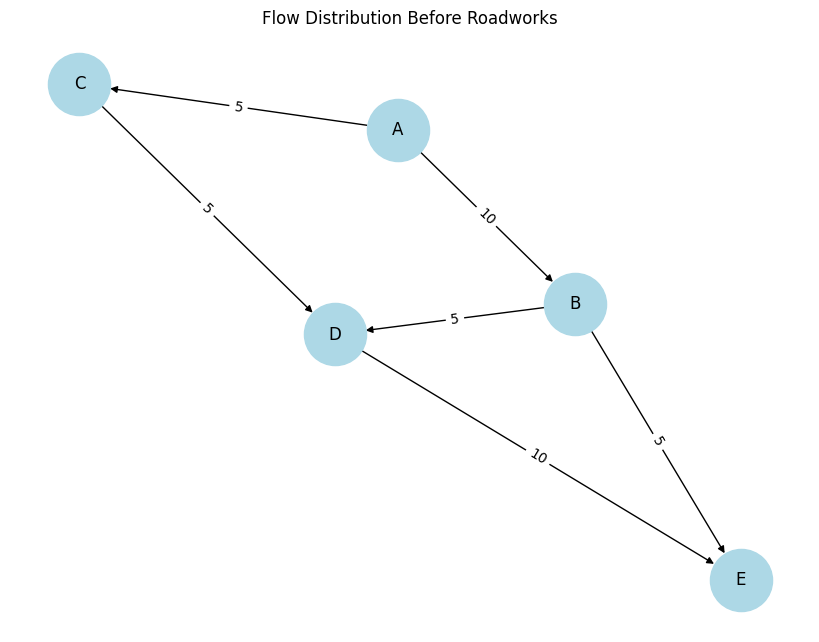

In [ ]:
import matplotlib.pyplot as plt

def visualize_flow(G, flow_dict, title):
    pos = nx.spring_layout(G)
    edge_labels = {}
    for u in flow_dict:
        for v in flow_dict[u]:
            if flow_dict[u][v] > 0:
                edge_labels[(u, v)] = flow_dict[u][v]
    
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

# Visualize initial flow
visualize_flow(G, initial_flow_dict, "Flow Distribution Before Roadworks")

## Maximum Flow via Edmonds-Karp vs Ford-Fulkerson

* The Edmonds-Karp algorithm is a specific implementation of the Ford-Fulkerson method 

* Edmonds-Karp employs Breadth-First Search (BFS) to find the shortest augmenting paths, thereby ensuring polynomial time complexity. $O(n^k)$

* Ford-Fulkerson Method:
    * A general algorithm to compute the maximum flow in a flow network.
	* It works by repeatedly finding augmenting paths from the source to the sink and increasing the flow until no more augmenting paths exist.
	* The method’s performance depends on how the augmenting paths are selected. Without a specific strategy, its time complexity can be unbounded, especially with irrational capacities.

* Edmonds-Karp Algorithm:
	* A specific implementation of the Ford-Fulkerson method.
	* It uses BFS to find the shortest (in terms of the number of edges) augmenting path in each iteration.
	* Guarantees a time complexity of  $O(V \times E^2)$  where  V  is the number of vertices and  E  is the number of edges.

* In summary, Edmonds-Karp is essentially Ford-Fulkerson with a specific path selection strategy (BFS), making it more efficient and predictable.


In [ ]:
def compute_max_flow(G, source, sink):
    # Compute the maximum flow using the Edmonds-Karp algorithm
    flow_value, flow_dict = nx.maximum_flow(G, source, sink, flow_func=nx.algorithms.flow.edmonds_karp)
    
    print(f"Maximum flow from {source} to {sink}: {flow_value} vehicles/hour")
    print("Flow distribution:")
    for u in flow_dict:
        for v in flow_dict[u]:
            if flow_dict[u][v] > 0:
                print(f"  {u} -> {v}: {flow_dict[u][v]} vehicles/hour")
    print("\n")
    return flow_value, flow_dict

In [ ]:
print("=== Initial Scenario ===")
initial_flow, initial_flow_dict = compute_max_flow(G, source, sink)

=== Initial Scenario ===
Maximum flow from A to E: 15 vehicles/hour
Flow distribution:
  A -> B: 10 vehicles/hour
  A -> C: 5 vehicles/hour
  B -> D: 5 vehicles/hour
  B -> E: 5 vehicles/hour
  C -> D: 5 vehicles/hour
  D -> E: 10 vehicles/hour




In [ ]:
# Simulate roadworks: reduce capacity of C -> D from 10 to 5
G['C']['D']['capacity'] = 5

print("=== After Roadworks on C -> D ===")
new_flow, new_flow_dict = compute_max_flow(G, source, sink)

=== After Roadworks on C -> D ===
Maximum flow from A to E: 15 vehicles/hour
Flow distribution:
  A -> B: 10 vehicles/hour
  A -> C: 5 vehicles/hour
  B -> D: 5 vehicles/hour
  B -> E: 5 vehicles/hour
  C -> D: 5 vehicles/hour
  D -> E: 10 vehicles/hour




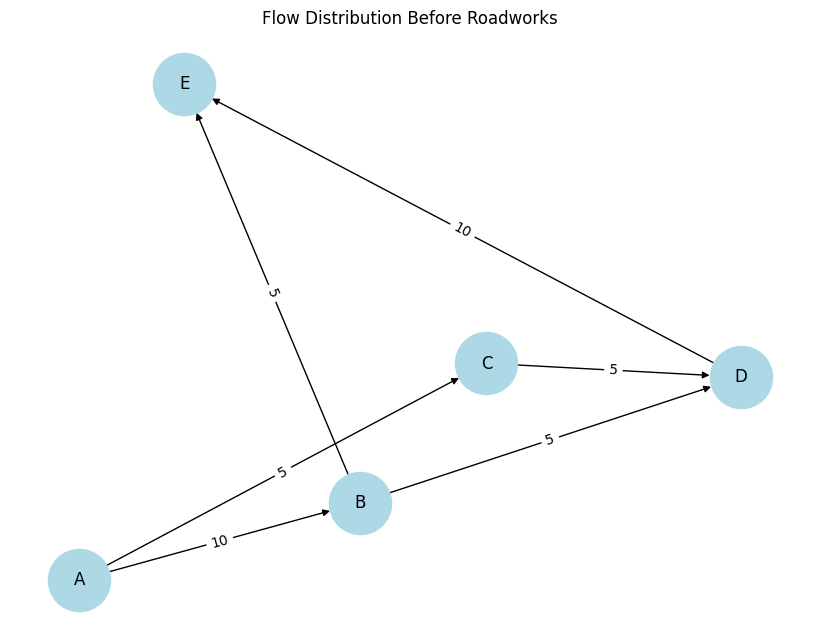

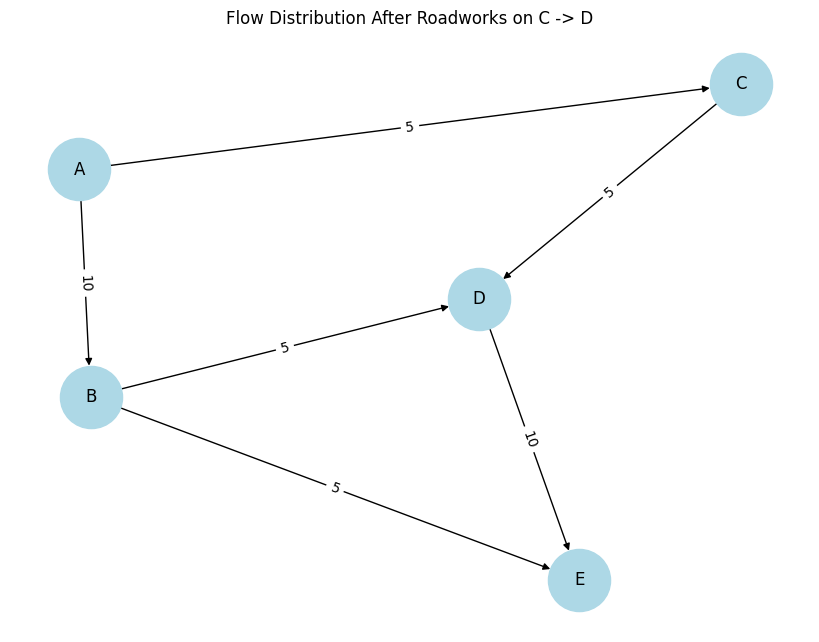

In [ ]:
import matplotlib.pyplot as plt

def visualize_flow(G, flow_dict, title):
    pos = nx.spring_layout(G)
    edge_labels = {}
    for u in flow_dict:
        for v in flow_dict[u]:
            if flow_dict[u][v] > 0:
                edge_labels[(u, v)] = flow_dict[u][v]
    
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

# Visualize initial flow
visualize_flow(G, initial_flow_dict, "Flow Distribution Before Roadworks")

# Visualize flow after roadworks
visualize_flow(G, new_flow_dict, "Flow Distribution After Roadworks on C -> D")

## minimax and maximin

* minimax route is one in which the maximum value of the individual arcs (edges) used is as small  as possible.

* A maximin route is one in which the minimum value of the individual arcs (edges) used is as large  as possible. 


What is Minimax?

* Minimax is a recursive decision-making algorithm used in adversarial environments, like two-player games. 

* The algorithm aims to:
	1.	Minimize the possible loss for the player if the opponent plays optimally.
	2.	Simultaneously maximize the possible gain by assuming both players act rationally.

* The process involves exploring all possible game states and choosing moves that optimize the worst-case scenario.

## Applying Dynamic Programming to network flows

* Maximin - Maximize the minimum capacity along a path

    * Optimising the most constrained link (bottleneck)

* Minimax - Minimize the maximum capacity (or other metric) along a path

    * Reduce the most overloaded / costly link

## Revisiting the traffic flow example: 

Initial Scenario:
* Path Identified: A → C → D → E
* Minimum Capacity: 10 vehicles/hour
* Interpretation: This path has a bottleneck capacity of 10 vehicles/hour, which is the smallest capacity along the path.
	
After Roadworks on C → D:
* Capacity Reduced: C → D from 10 to 5 vehicles/hour
* New Path Identified: A → B → D → E
* Minimum Capacity: 5 vehicles/hour
* Interpretation: Due to the roadworks reducing the capacity of C → D, the Maximin path shifts to A → B → D → E with a reduced minimum capacity of 5 vehicles/hour.

Advantages of the Maximin Approach

* Identifies Critical Paths: Highlights the most constrained paths in the network.
* Enhances Reliability: By focusing on maximizing the minimum capacity, it ensures that the weakest links are optimized.
* Facilitates Decision-Making: Helps in prioritizing infrastructure improvements or reallocating resources to critical sections.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges along with their capacities
G.add_edge('A', 'B', capacity=10)
G.add_edge('A', 'C', capacity=15)
G.add_edge('B', 'D', capacity=10)
G.add_edge('C', 'D', capacity=10)
G.add_edge('B', 'E', capacity=5)
G.add_edge('D', 'E', capacity=10)

In [2]:
source = 'A'
sink = 'E'

In [5]:
def visualize_path(G, path, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8,6))
    
    # Draw all nodes and edges
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    # Highlight the path
    if path:
        # Create a list of edge tuples in the path
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, arrows=True)
        edge_labels = {(u, v): G[u][v]['capacity'] for u, v in path_edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def maximin_path(G, source, sink):
    """
    Finds the path from source to sink with the maximum minimum capacity.
    """
    import heapq

    # Initialize capacities to negative infinity
    max_min_capacity = {node: float('-inf') for node in G.nodes}
    max_min_capacity[source] = float('inf')

    # Priority queue: (current max min capacity, node, path)
    heap = [(-max_min_capacity[source], source, [])]

    visited = set()

    while heap:
        # Get the node with the current highest min capacity
        current_capacity, u, path = heapq.heappop(heap)
        current_capacity = -current_capacity

        if u in visited:
            continue
        visited.add(u)
        path = path + [u]

        if u == sink:
            return current_capacity, path

        for v in G.neighbors(u):
            if v not in visited:
                edge_capacity = G[u][v]['capacity']
                # The minimal capacity along the path is the min of current path and this edge
                min_capacity = min(current_capacity, edge_capacity)
                if min_capacity > max_min_capacity[v]:
                    max_min_capacity[v] = min_capacity
                    heapq.heappush(heap, (-max_min_capacity[v], v, path))
    
    return None, None  # No path found

=== Initial Maximin Path ===
Path: A -> C -> D -> E
Minimum capacity along this path: 10 vehicles/hour



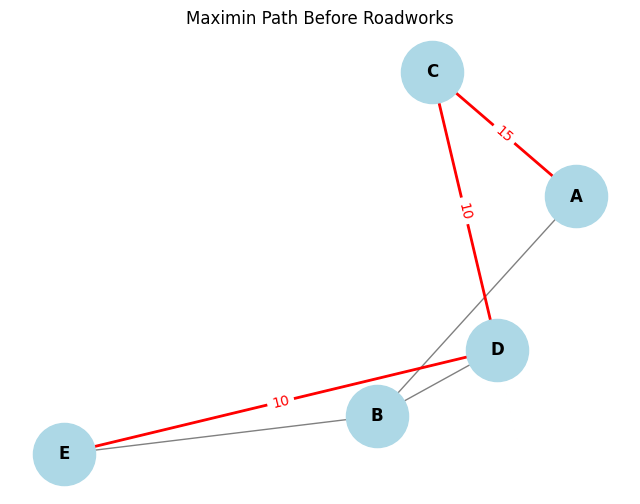

In [6]:
# Find the maximin path
capacity, path = maximin_path(G, source, sink)

print("=== Initial Maximin Path ===")
print(f"Path: {' -> '.join(path)}")
print(f"Minimum capacity along this path: {capacity} vehicles/hour\n")

# Visualize the path
visualize_path(G, path, "Maximin Path Before Roadworks")

## Simulate Roadworks

In [7]:
def simulate_roadworks(G, road, new_capacity):
    """
    Simulates roadworks by reducing the capacity of a specified road.
    """
    u, v = road
    if G.has_edge(u, v):
        G[u][v]['capacity'] = new_capacity
        print(f"Roadworks: Capacity of {u} -> {v} reduced to {new_capacity} vehicles/hour.\n")
    else:
        print(f"Error: Road {u} -> {v} does not exist in the network.\n")

=== Maximin Path After Roadworks on C -> D ===
Path: A -> C -> D -> E
Minimum capacity along this path: 10 vehicles/hour



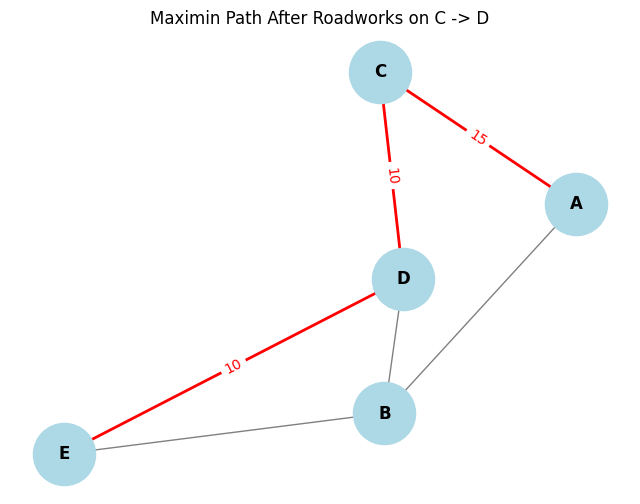

In [8]:
# Recompute the maximin path after roadworks
new_capacity, new_path = maximin_path(G, source, sink)

print("=== Maximin Path After Roadworks on C -> D ===")
print(f"Path: {' -> '.join(new_path)}")
print(f"Minimum capacity along this path: {new_capacity} vehicles/hour\n")

# Visualize the new path
visualize_path(G, new_path, "Maximin Path After Roadworks on C -> D")

## Summary 

* The style of Dynamic Programming - reusing solutions to subproblems - was first proposed by Richard Bellman. 

* <b>Top-down approach</b> (Memoization with recursion)
   
* <b>Bottom-down approach</b>: (Tabulation with iteration)

* Shortest paths - topological sort 

* Network flows - minimax can be DP-ified! 

## Exercise 

You are given a rod of length $n$ and a table of prices that includes the selling price for rods of length  $1, 2, ..., n$. 

Your task is to determine the maximum revenue that can be obtained by cutting the rod into smaller pieces and selling them. You can make as many cuts as you want, and the order of the pieces doesn’t matter.

Input:
Rod length  $n = 8$ , prices = `[1, 5, 8, 9, 10, 17, 17, 20]`.

Output:
Maximum revenue = 22.
(One possible way to achieve this: cut the rod into two pieces of lengths  2  and  6 , with prices  5 + 17 = 22 ).

In [13]:
def rod_cutting(n, prices):
    ...

In [12]:
n = 8
prices = [1, 5, 8, 9, 10, 17, 17, 20]
print("Maximum Revenue:", rod_cutting(n, prices))  

Maximum Revenue: 22


## Exercise 

Given the maximum weight that a knapsack (or rucksack / backpack) can hold, write a function which will determin the most valuable subset of items that can be included in the rucksack without exceeding its weight limit. 

Inputs will be: 
*   $W$ (the max weight the rucksack can hold)
*   $n$ (number of items)
*   The weights and values of the items (as a list)

Input:
* n = 4 ,  W = 7 ,
* weights = [1, 3, 4, 5] ,
* values = [1, 4, 5, 7] .

Output:
Maximum Value =  9 .


In [ ]:
def knapsack(n, W, weights, values):
    ...

In [ ]:
n = 4
W = 7
weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]

print("Maximum Value:", knapsack(n, W, weights, values))  # Output: 9

Maximum Value: 9


Extension on the knapsack exercise: now code your function to return the items which constitute the maximum value. 

In [ ]:
# Amend the knapsack function above.

## Exercise

Remember that function you wrote in the first notebook to check if a given string is a palindrome (same word forwards as backwards)? Examples of palindromes include 'eve', 'madam', 'racecar' etc.

If you didn't write this function, then now is your chance to solve this! 

If you did write a function in the first week then here's your chance to extend this with dynamic programming: Given a string `s`, find the longest contiguous substring of `s` that is a palindrome.




In [ ]:
def longest_palindromic_substring(s):
    ...

In [2]:
s = "babad"
print(longest_palindromic_substring(s))


aba


In [4]:
s = "esthereven"
print(longest_palindromic_substring(s))

eve


In [5]:
s = "racecar"
print(longest_palindromic_substring(s))

racecar


## Exercise

Given two sequences, use dynamic programming to find the length of the longest common subsequences (LCS) present in both of them. 

For example:   
`x = "AGGTAB"`  
`y = "GXTXAYB"`

Length of `LCS = 4`  
(The LCS is `"GTAB"`.)


In [ ]:
def longest_common_subsequence(X, Y):
    ...


In [9]:
X = "AGGTZABA"
Y = "GXRTXAYBT"
print("Length of LCS:", longest_common_subsequence(X, Y))

Length of LCS: 4


## Exercise

Given a positive integer $n$, determine the number of ways to partition $n$ as a sum of positive integers. Each partition is a unique way of expressing $n$ as a sum where the order of addends does not matter.

Input:
n = 5 

Output:
7

The partitions of 5 are:
1.	 $5$ 
2.	 $4 + 1$ 
3.	 $3 + 2$ 
4.	 $3 + 1 + 1$ 
5.	 $2 + 2 + 1$ 
6.	 $2 + 1 + 1 + 1$ 
7.	 $1 + 1 + 1 + 1 + 1$ 


In [ ]:
def partition_count(n):
    ...


In [17]:
n = 5
print("Number of partitions:", partition_count(n))  # Output: 7

Number of partitions: 7


Extension: If you used a 2D DP Table for your answer above, now write the solution as a 1D DP array. 

In [ ]:
# Make a copy of your function here and optimise this. 

## Exercise 

Given a directed graph $G$ with $n$ nodes and $m$ edges, each edge $(u, v)$ has a capacity $c(u, v)$. Determine the maximum possible flow from a source $s$ to a sink $t$, such that the maximum flow through any single edge is minimized.

This problem minimizes the “bottleneck” of the network, ensuring that no single edge carries an excessive amount of the flow.

## Exericse

Given a flow network, find a path from $s$ to $t$ such that the minimum edge capacity along the path is maximized.

Given a directed graph $G$ with $n$ nodes and $m$ edges, find the maximum flow $F$ from source $s$ to sink $t$, such that the minimum flow through any edge in the solution is maximized.

Extension: This problem maximizes the smallest amount of flow on any edge used in the final flow, ensuring a “balanced” distribution of flow across the network.

## Exercise (Towers of Hanoi)

Towers of Hanoi is a mathematical puzzle consisting of three rods and a number of disks of different sizes. The puzzle starts with the disks neatly stacked in ascending order of size on one rod, the smallest at the top, making a conical shape. The objective is to move the entire stack to another rod, following these simple rules:

1.	Only one disk can be moved at a time.

2.	Each move consists of taking the upper disk from one of the stacks and placing it on top of another stack or on an empty rod.

3.	No larger disk may be placed on top of a smaller disk.

![towers_3_gif](https://www.tutorialspoint.com/data_structures_algorithms/images/tower_of_hanoi.gif)

Task: First write a recursive algorithm to solve the Towers of Hanoi for $n$ disks. Then compare this recursive solution to an iterative algorithm that it will also work for $n$ disks. What do you notice? Which is more efficient as $n$ grows?

Extension: Is it possible to apply dynamic programming principles to write a more efficient solution? If is not possible, explain why.


## Floyd-Warshall Algorithm - all pairs shortest paths



Floyd Warshall algorithm - all-pairs shortest paths
* This is a dynamic programming approach to build up the solution for the shortest paths step by step. 
* It considers each pair of vertices and iteratively improves the path between them by considering each possible intermediate vertex.
*
* Step 1. Initialization: 
*   Create a 2D array dist where dist[i][j] represents the shortest distance from vertex i to vertex j. 
*   Initialize dist[i][j] to the weight of the edge from i to j if it exists, otherwise to infinity. 
*   Set dist[i][i] = 0 for all vertices i.
*
* Step 2. Dynamic Programming:  
*   Update the distance array dist by considering each vertex as an intermediate vertex and 
*   updating the shortest paths accordingly. For each pair of vertices (i, j), update dist[i][j].
*
* Step 3. Result: 
*   After considering all vertices as intermediate vertices, the dist array contains the 
*   shortest paths between all pairs of vertices.
*
*
*/
